In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [7]:
df_train = pd.read_csv('df_train_1.csv')
df_test_X = pd.read_csv('df_test_X1.csv')

In [8]:
X=df_train[['station_id','hdres_100','hdres_500','ldres_100','ldres_500','industry_100','industry_500','urbgreen_100','urbgreen_500','roads_length_25','roads_length_100','roads_length_500','major_roads_length_25','major_roads_length_100','major_roads_length_500','distance_0','distance_1','distance_2','distance_3','distance_4','distance_5','distance_6','distance_7','distance_8','distance_9','value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9','y_benchmark']]
y=df_train['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=60)

# <span style="color:blue">SAMPLE 5% DATA SET</span>

In [9]:
df_train_sample = pd.DataFrame.sample(df_train, n=140000, random_state=60)

X_sample=df_train_sample[['station_id','hdres_100','hdres_500','ldres_100','ldres_500','industry_100','industry_500','urbgreen_100','urbgreen_500','roads_length_25','roads_length_100','roads_length_500','major_roads_length_25','major_roads_length_100','major_roads_length_500','distance_0','distance_1','distance_2','distance_3','distance_4','distance_5','distance_6','distance_7','distance_8','distance_9','value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9']]
y_sample=df_train_sample['value']
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.25, random_state=60)

# <span style="color:black">ACCURACY Function</span>

In [10]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#  <span style="color:black">SOME REGRESSION MODELS</span>

In [65]:
from sklearn.linear_model import SGDRegressor, Lasso, LarsCV, ElasticNetCV, LassoLarsCV, RidgeCV, OrthogonalMatchingPursuitCV, LinearRegression 
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_sample)  #fit only on training data
X_train_sample = scaler.transform(X_train_sample)
X_test_sample = scaler.transform(X_test_sample)  # apply same transformation to test data

In [68]:
# Ensemble de régresseurs linéaires

LinearReg = LinearRegression()
Gboost_Regressor = GradientBoostingRegressor()
SGDReg = SGDRegressor()
Lass = Lasso()
Lars = LarsCV()
ElastNetCV = ElasticNetCV()
LassLars = LassoLarsCV()
Ridge = RidgeCV()
OrthogonalMatchingPursuit = OrthogonalMatchingPursuitCV()
ExtraTrReg = ExtraTreesRegressor()
rf = RandomForestRegressor()

In [70]:
# double dico (noms, algo) --> (noms, score_algo)

methods_dict = {'Gboost_Regressor':Gboost_Regressor, 'LinearRegression':LinearReg, 'SGDRegressor':SGDReg, 'Lasso':Lass, 'LarsCV':Lars, 'ElasticNetCV':ElastNetCV, 'LassoLarsCV':LassLars, 'RidgeCV':Ridge, 'OrthogonalMatchingPursuitCV':OrthogonalMatchingPursuit, 'ExtraTreesRegressor':ExtraTrReg, 'RandomForestRegressor':rf}
results_dict = {'Gboost_Regressor':0.0,'LinearRegression':0.0,'SGDRegressor':0.0,'Lasso':0.0,'LarsCV':0.0,'ElasticNetCV':0.0,'LassoLarsCV':0.0,'RidgeCV':0.0,'OrthogonalMatchingPursuitCV':0.0,'ExtraTreesRegressor':0.0,'RandomForestRegressor':0.0}

LinearReg_predictions, Gboost_Regressor_predictions, SGDRegressor_predictions, Lasso_predictions, LarsCV_predictions, ElasticNetCV_predictions, LassoLarsCV_predictions, RidgeCV_predictions, OrthogonalMatchingPursuitCV_predictions, ExtraTrReg_predictions, rf_predictions = 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.

print('Regressor Models accuracy (%) :')
for name_method in methods_dict:
    
    methods_dict[name_method].fit(X_train_sample, y_train_sample)
    print('-----------------------------')
    print("{} :".format(name_method))
    results_dict[name_method] = evaluate(methods_dict[name_method], X_test_sample, y_test_sample)

Regressor Models accuracy (%) :
-----------------------------
Gboost_Regressor :
Model Performance
Average Error: 5.0859 degrees.
Accuracy = 69.18%.
-----------------------------
LinearRegression :
Model Performance
Average Error: 5.8333 degrees.
Accuracy = 64.63%.


D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-----------------------------
SGDRegressor :
Model Performance
Average Error: 5.8176 degrees.
Accuracy = 64.65%.
-----------------------------
Lasso :
Model Performance
Average Error: 6.1121 degrees.
Accuracy = 61.29%.
-----------------------------
LarsCV :
Model Performance
Average Error: 5.8299 degrees.
Accuracy = 64.82%.
-----------------------------
ElasticNetCV :
Model Performance
Average Error: 5.8162 degrees.
Accuracy = 64.86%.
-----------------------------
LassoLarsCV :
Model Performance
Average Error: 5.8333 degrees.
Accuracy = 64.63%.
-----------------------------
RidgeCV :
Model Performance
Average Error: 5.8307 degrees.
Accuracy = 64.67%.
-----------------------------
OrthogonalMatchingPursuitCV :
Model Performance
Average Error: 6.2285 degrees.
Accuracy = 61.98%.
-----------------------------
ExtraTreesRegressor :
Model Performance
Average Error: 4.4417 degrees.
Accuracy = 73.88%.
-----------------------------
RandomForestRegressor :
Model Performance
Average Error: 4.6315

In [72]:
values = list(results_dict.values())
values

[69.17569683921886,
 64.63385976008783,
 64.65353522430618,
 61.285335831930695,
 64.81845116458484,
 64.86162225099778,
 64.63385976011617,
 64.67356279467387,
 61.97567525985625,
 73.88121318164124,
 73.00014447198166]

In [71]:
keys = list(results_dict.keys())
keys

['Gboost_Regressor',
 'LinearRegression',
 'SGDRegressor',
 'Lasso',
 'LarsCV',
 'ElasticNetCV',
 'LassoLarsCV',
 'RidgeCV',
 'OrthogonalMatchingPursuitCV',
 'ExtraTreesRegressor',
 'RandomForestRegressor']

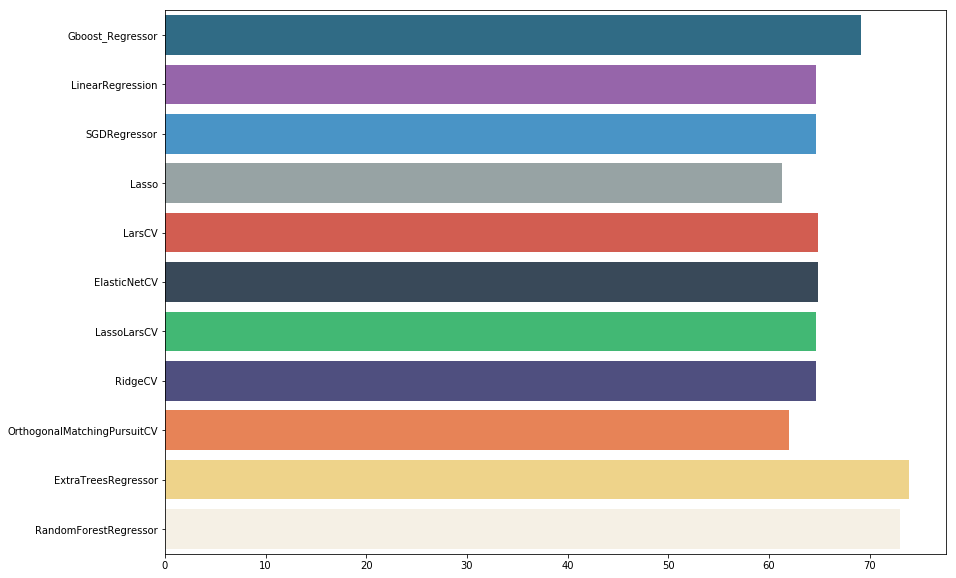

In [77]:
# deep, muted, bright, pastel, dark, colorblin
plt.figure(figsize=(14,10))
sns.color_palette(flatui)
sns.barplot(values,keys,palette=flatui)

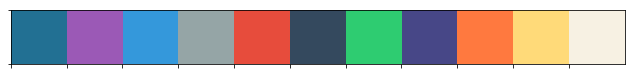

In [74]:
flatui = ["#227093", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#474787", "#ff793f", "#ffda79", "#f7f1e3"]
sns.palplot(sns.color_palette(flatui))

 <span style="color:green">ExtraTree est la méthode qui donne les meilleurs résultats (méthode ensembliste)</span>

In [14]:
ExtraTreesRegressor_predictions = ExtraTrReg.predict(X_test_sample)

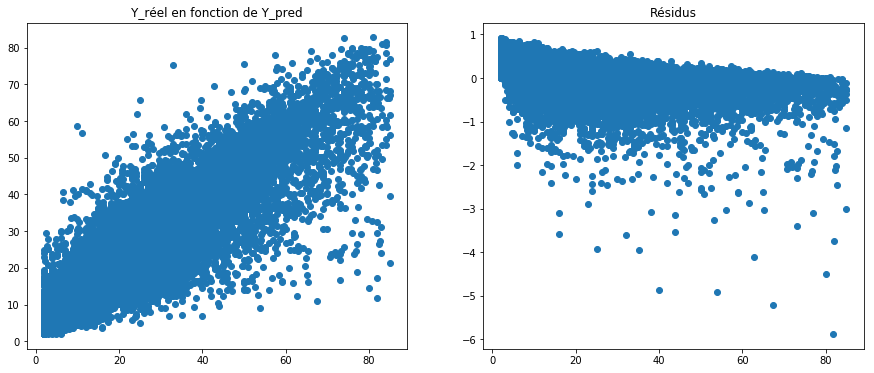

In [15]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Y_réel en fonction de Y_pred')
plt.scatter(y_test_sample,ExtraTreesRegressor_predictions)

plt.subplot(1,2,2)
plt.title('Résidus')
plt.scatter(y_test_sample,(ExtraTreesRegressor_predictions-y_test_sample)/ExtraTreesRegressor_predictions)

#  <span style="color:black">SVR and Kernel Ridge</span>

In [16]:
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_sample)  #fit only on training data
X_train_sample = scaler.transform(X_train_sample)
X_test_sample = scaler.transform(X_test_sample)  # apply same transformation to test data

In [18]:
#SVR = SVR()
KernelRidge = KernelRidge(kernel='rbf')

In [20]:
%%time
KernelRidge.fit(X_train_sample, y_train_sample)
kernel_predictions = KernelRidge.predict(X_test_sample)

MemoryError: 

In [69]:
evaluate(KernelRidge, X_test_sample, y_test_sample)

Model Performance
Average Error: 4.7124 degrees.
Accuracy = 71.85%.


71.850564058449

In [70]:
mse = mean_squared_error(y_test_sample, kernel_predictions)
print("MSE: %.4f" % mse)

mse_log = mean_squared_log_error(y_test_sample, kernel_predictions)
print("MSE_log: %.4f" % mse_log)

MSE: 58.6820
MSE_log: 0.1005
